https://scikit-fuzzy.readthedocs.io/en/latest/_downloads/plot_tipping_problem_newapi.py

http://ww1.infoclusters.com/fuzzy-logic-in-machine-learning-with-python-code/

In [7]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzzy

#Antecedent is used for input parameters and Consequent is used for output. Here ca,mte,ete are input and cgpa is output.
ca=ctrl.Antecedent(np.arange(0,26,1),'ca') #ca marks range 0-25
mte=ctrl.Antecedent(np.arange(0,26,1),'mte') #mte marks range 0-25
ete=ctrl.Antecedent(np.arange(0,51,1),'ete') #ete marks range 0-50
cgpa=ctrl.Consequent(np.arange(0,11,1),'cgpa') #cgpa between 0-10

#now we consider bad ca when marks are between 0-10, average when marks between 9-20 and good when marks between 18-25.

ca['bad']=fuzzy.trimf(ca.universe,[0,5,10]) 
ca['avg']=fuzzy.trimf(ca.universe,[9,15,20])
ca['good']=fuzzy.trimf(ca.universe,[18,23,25])

#now we consider bad mte when marks are between 0-10, average when marks between 9-20 and good when marks between 18-25.

mte['bad']=fuzzy.trimf(mte.universe,[0,5,10])
mte['avg']=fuzzy.trimf(mte.universe,[8,15,20])
mte['good']=fuzzy.trimf(mte.universe,[18,23,25])

#now we consider bad ete when marks are between 0-10, average when marks between 18-35 and good when marks between 33-50.

ete['bad']=fuzzy.trimf(ete.universe,[0,10,20])
ete['avg']=fuzzy.trimf(ete.universe,[18,25,35])
ete['good']=fuzzy.trimf(ete.universe,[33,40,50])

#now we consider bad cgpa when marks are between 0-5, average when marks between 4-7.5 and good when marks between 7-10.

cgpa['bad']=fuzzy.trimf(cgpa.universe,[0,3,5])
cgpa['avg']=fuzzy.trimf(cgpa.universe,[4,6,7.5])
cgpa['good']=fuzzy.trimf(cgpa.universe,[7,9,10])



D:\Anaconda\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


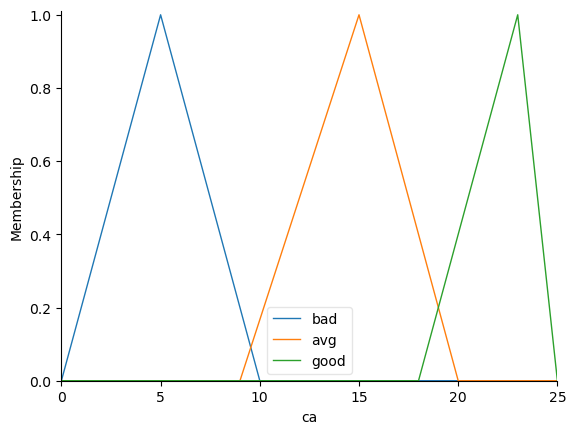

In [2]:
ca.view()


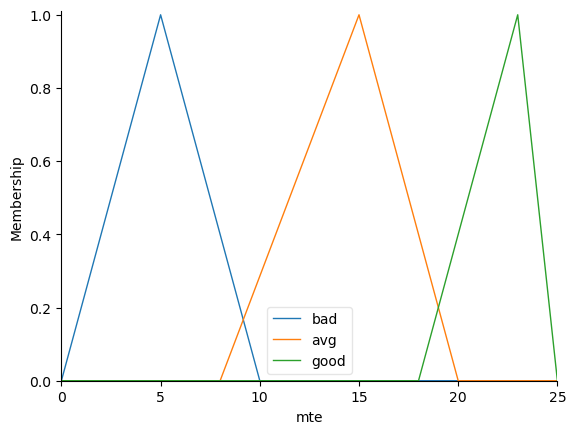

In [3]:
mte.view()


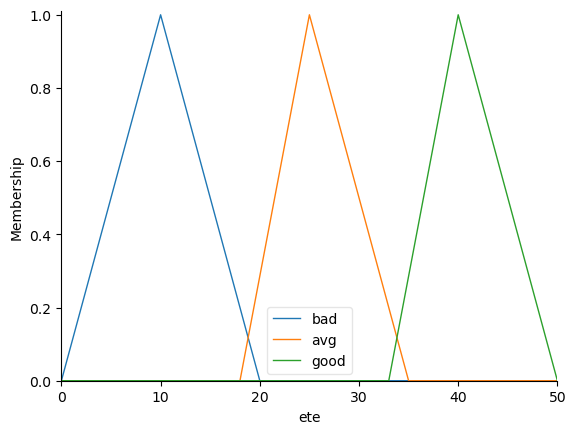

In [4]:
ete.view()


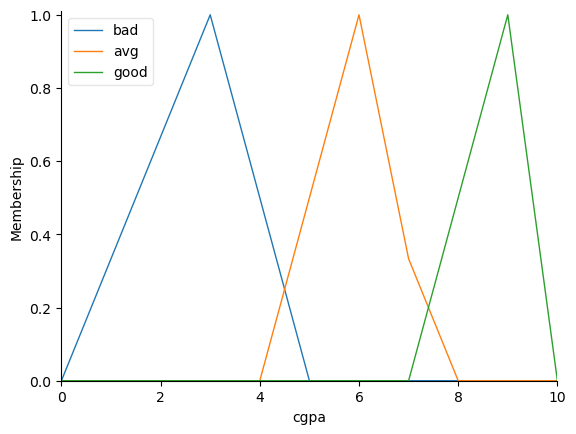

In [5]:
cgpa.view()

8.591666666666669


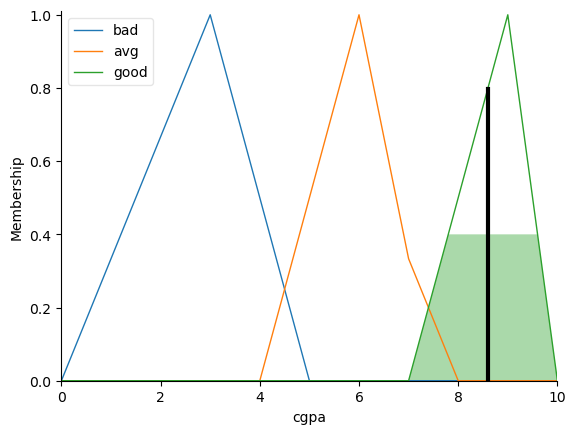

In [6]:
#now we will decide rules based on creteria of ca, mte and ete.

rule1=ctrl.Rule(ca['bad'] & mte['bad'] & ete['bad'],cgpa['bad'])
rule2=ctrl.Rule(ca['avg'] & mte['avg'] & ete['avg'],cgpa['avg'])
rule3=ctrl.Rule(ca['good'] & mte['good'] & ete['good'],cgpa['good'])
rule4=ctrl.Rule(ca['bad'] & mte['good'] & ete['good'],cgpa['good'])
rule5=ctrl.Rule(ca['good'] & mte['bad'] & ete['good'],cgpa['avg'])
rule6=ctrl.Rule(ca['good'] & mte['good'] & ete['bad'],cgpa['bad'])
rule7=ctrl.Rule(ca['bad'] & mte['bad'] & ete['good'],cgpa['bad'])
rule8=ctrl.Rule(ca['good'] & mte['avg'] & ete['good'],cgpa['good'])
rule9=ctrl.Rule(ca['avg'] & mte['good'] & ete['good'],cgpa['good'])
rule10=ctrl.Rule(ca['good'] & mte['bad'] & ete['bad'],cgpa['bad'])
#pass the value to ControlSystem and Simulate before calculating actual output.

cg_calc=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
cgpaa=ctrl.ControlSystemSimulation(cg_calc)

#Now pass input as 
cgpaa.input['ca']=18
cgpaa.input['mte']=22
cgpaa.input['ete']=41

cgpaa.compute() #calculate cgpa

print(cgpaa.output['cgpa']) #print calculated cgpa
cgpa.view(sim=cgpaa) #visualize outputb